### Part 2: Deletions - Random Selection of Structural Variants


** Background**
- 5000 Insertions and 5000 Deletions were randomly selected from our union callset of sequence resolved variants.

- **3991** unique insertions are described below.

- Features were generated by svviz to describe each variant

- tSNE was used to visualize the structure of the data

- The goal is to randomly select datapoints from each unique group/tSNE cluster and distribute these selected variants for manual curation. 

- In order to randomly select samples from each unique tSNE cluster, DBSCAN will be used to generate cluster labels. For each set of DBSCAN cluster labels, a select number will be randomly selected from each cluster group.

**Technical Overview**

Part 2

- Secondary DBSCAN analyses to generate cluster groups
- The resulting dataframe tSNE analysis was run through a DBSCAN model in min_samples altered for each iteration; min_samples = 0, 5, 10, 15, 20
- For each interation of the min_sample/DBSCAN analysis, the following is displayed:
    - tSNE plot with DSCAN clusters
    - Histogram displaying the frequency of each cluter label
    - Cumulative distribution plot for each histogram
- The following analysis only shows DBSCAN results from tSNE alone (excludes SVD results). Given the results from the itnital analysis, I think that the DBSCAN/tSNE results gives the best representation of the data.

***
** Part 2 **
***

In [1]:
'''
Import statements
'''
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
import sqlite3
from sklearn.manifold import TSNE
import bokeh.palettes as palettes
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import DBSCAN
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [2]:
'''
Load Data
'''
df = pd.read_csv('dftsne_DEL.csv')
minSample0 = pd.read_csv('DEL.tSNE_minSample_0.csv')
minSample5 = pd.read_csv('DEL.tSNE_minSample_5.csv')
minSample10 = pd.read_csv('DEL.tSNE_minSample_10.csv')
minSample15 = pd.read_csv('DEL.tSNE_minSample_15.csv')
minSample20 = pd.read_csv('DEL.tSNE_minSample_20.csv')

In [3]:
df['minSample0'] = minSample0['clusterLabel']
df['minSample5'] = minSample5['clusterLabel']
df['minSample10'] = minSample10['clusterLabel']
df['minSample15'] = minSample15['clusterLabel']
df['minSample20'] = minSample20['clusterLabel']

** DBSCAN Minimum Samples: 0 **

In [4]:
output_notebook()
p = figure()

x = df['x']
y = df['y']
samp = df['minSample0']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@minSample0"),
        ]
    )

p = Scatter(df, x='x', y='y', color='minSample0', palette=palettes.Category20[20],tools=[hover,"pan,wheel_zoom,box_zoom,reset,resize"])
output_file("tSNE_DBSCAN_DEL_minSample0_label.html")
show(p)

Loading BokehJS ...

** Display Histogram/CDF **

 35    385
 0     378
-1     372
 12    316
 4     175
 1     162
 10    160
 6     146
 7     126
 60    104
 22     96
 2      86
 18     76
 47     73
 40     67
 20     64
 23     51
 11     49
 13     48
 39     48
 25     40
 3      37
 5      36
 8      36
 53     35
 16     30
 73     27
 38     27
 32     26
 43     26
      ... 
 28     10
 46      9
 61      9
 81      9
 34      9
 30      8
 88      8
 52      8
 77      8
 84      8
 63      8
 49      8
 50      7
 75      7
 71      7
 67      7
 65      6
 41      6
 91      6
 90      6
 78      6
 68      6
 66      6
 87      5
 83      5
 86      5
 36      5
 58      5
 79      5
 89      5
Name: minSample0, dtype: int64


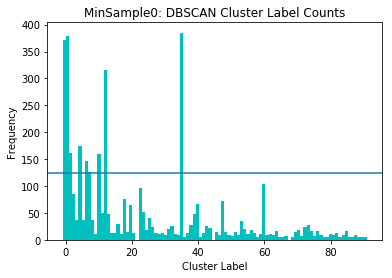

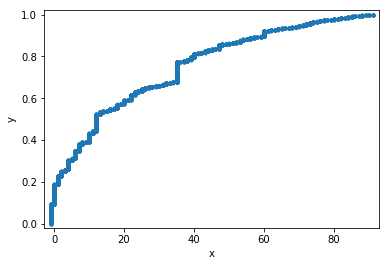

In [6]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
lab = df['minSample0']
counting = df.groupby('minSample0').count()
countr = df['minSample0'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("MinSample0: DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['minSample0'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['minSample0'])) / (len(df['minSample0']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** DBSCAN Minimum Samples: 5 **

In [5]:
output_notebook()
p = figure()

x = df['x']
y = df['y']
samp = df['minSample5']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@minSample5"),
        ]
    )

p = Scatter(df, x='x', y='y', color='minSample5', palette=palettes.Category20[20],tools=[hover,"pan,wheel_zoom,box_zoom,reset,resize"])
output_file("tSNE_DBSCAN_DEL_minSample5_label.html")
show(p)

Loading BokehJS ...

INFO:bokeh.core.state:Session output file 'tSNE_DBSCAN_DEL_minSample5_label.html' already exists, will be overwritten.


** Display Histogram/CDF **

 0     394
 12    394
 25    392
-1     335
 4     188
 1     166
 10    161
 6     142
 7     126
 21    122
 55    103
 16     85
 46     73
 18     69
 19     64
 3      55
 11     53
 22     51
 13     48
 80     41
 5      38
 58     35
 24     35
 8      34
 39     29
 38     27
 71     27
 14     24
 51     23
 70     23
      ... 
 50      8
 37      8
 48      8
 63      8
 52      8
 29      8
 74      8
 78      8
 62      7
 64      7
 32      7
 69      7
 73      7
 83      6
 40      6
 76      6
 87      6
 26      6
 65      6
 86      5
 34      5
 60      5
 68      5
 82      5
 88      5
 27      5
 33      5
 47      5
 89      5
 84      4
Name: minSample5, dtype: int64


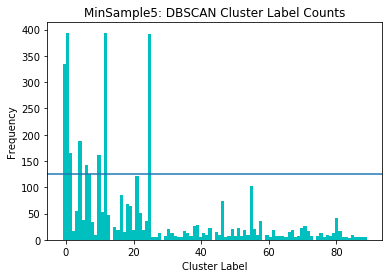

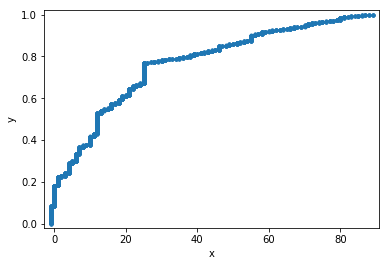

In [8]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
lab = df['minSample5']
counting = df.groupby('minSample5').count()
countr = df['minSample5'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("MinSample5: DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['minSample5'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['minSample5'])) / (len(df['minSample5']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** DBSCAN Minimum Samples: 10 **

In [29]:
output_notebook()
p = figure()

x = df['x']
y = df['y']
samp = df['minSample10']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@minSample10"),
        ]
    )

p = Scatter(df, x='x', y='y', color='minSample10', palette=palettes.Category20[20],tools=[hover,"pan,wheel_zoom,box_zoom,reset,resize"])
output_file("tSNE_DBSCAN_DEL_minSample10_label.html")
show(p)

Loading BokehJS ...

INFO:bokeh.core.state:Session output file 'tSNE_DBSCAN_DEL_minSample10_label.html' already exists, will be overwritten.


** Display Histogram/CDF **

-1     925
 9     302
 0     244
 32    157
 2     156
 7     144
 5     112
 14     92
 50     81
 48     81
 4      72
 10     65
 15     64
 44     60
 38     57
 37     54
 8      50
 11     48
 12     47
 17     45
 18     43
 21     42
 20     42
 16     41
 68     40
 73     33
 74     32
 3      32
 39     32
 30     29
      ... 
 60     16
 42     15
 6      15
 78     15
 54     15
 69     15
 35     15
 13     15
 75     14
 77     14
 43     13
 31     13
 72     12
 63     12
 27     12
 28     12
 71     12
 56     12
 22     12
 66     12
 47     11
 25     10
 61     10
 70     10
 65     10
 67     10
 64     10
 26     10
 19     10
 53      7
Name: minSample10, dtype: int64


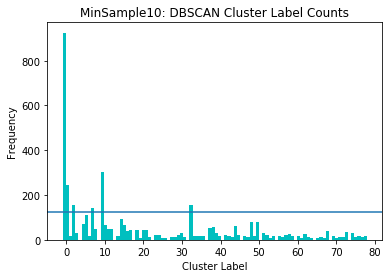

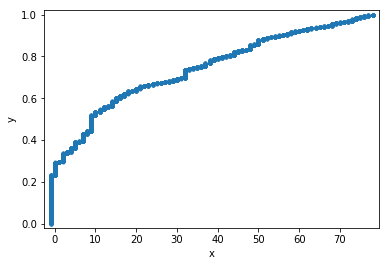

In [13]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
lab = df['minSample10']
counting = df.groupby('minSample10').count()
countr = df['minSample10'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("MinSample10: DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['minSample10'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['minSample10'])) / (len(df['minSample10']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** DBSCAN Minimum Samples: 15 **

In [30]:
output_notebook()
p = figure()

x = df['x']
y = df['y']
samp = df['minSample15']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@minSample15"),
        ]
    )

p = Scatter(df, x='x', y='y', color='minSample15', palette=palettes.Category20[20],tools=[hover,"pan,wheel_zoom,box_zoom,reset,resize"])
output_file("tSNE_DBSCAN_DEL_minSample15_label.html")
show(p)

Loading BokehJS ...

INFO:bokeh.core.state:Session output file 'tSNE_DBSCAN_DEL_minSample15_label.html' already exists, will be overwritten.


** Display Histogram/CDF ***

-1     1724
 20     115
 4      114
 2      105
 26     104
 1      104
 5      102
 6       93
 21      90
 9       65
 19      56
 7       50
 18      49
 44      48
 10      44
 11      42
 47      40
 16      39
 29      39
 40      39
 46      35
 51      35
 28      34
 0       32
 49      29
 15      28
 54      28
 38      27
 31      26
 43      26
       ... 
 32      24
 42      24
 3       23
 23      22
 37      22
 14      22
 36      21
 24      21
 48      21
 12      20
 52      19
 25      19
 55      19
 35      18
 34      18
 27      17
 17      17
 22      17
 41      16
 39      16
 61      15
 30      15
 50      15
 60      15
 33      15
 45      15
 57      13
 58      12
 62      12
 59      10
Name: minSample15, dtype: int64


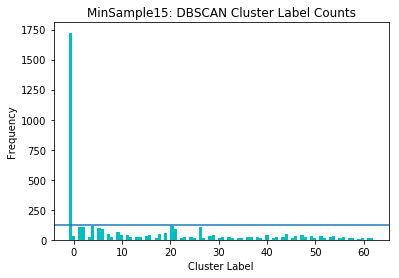

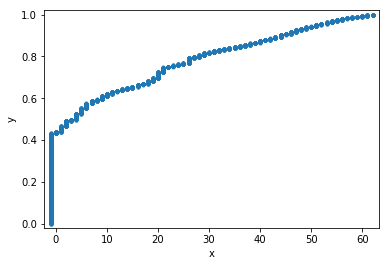

In [14]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
lab = df['minSample15']
counting = df.groupby('minSample15').count()
countr = df['minSample15'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("MinSample15: DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['minSample15'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['minSample15'])) / (len(df['minSample15']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** DBSCAN Minimum Samples: 20 **

In [26]:
from bokeh.models import HoverTool, TapTool, BoxZoomTool, BoxSelectTool, ResetTool
output_notebook()
p = figure()

x = df['x']
y = df['y']
samp = df['minSample20']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@minSample20"),
        ]
    )
Tools = [TapTool(), BoxZoomTool(), BoxSelectTool(), ResetTool()]
p = Scatter(df, x='x', y='y', color='minSample20', palette=palettes.Category20[20],tools=[hover,"pan,wheel_zoom,box_zoom,reset,resize"])
output_file("tSNE_DBSCAN_DEL_minSample20_label.html")
show(p)

Loading BokehJS ...

INFO:bokeh.core.state:Session output file 'tSNE_DBSCAN_DEL_minSample20_label.html' already exists, will be overwritten.


** Display Histogram/CDF **

-1     1724
 20     115
 4      114
 2      105
 26     104
 1      104
 5      102
 6       93
 21      90
 9       65
 19      56
 7       50
 18      49
 44      48
 10      44
 11      42
 47      40
 16      39
 29      39
 40      39
 46      35
 51      35
 28      34
 0       32
 49      29
 15      28
 54      28
 38      27
 31      26
 43      26
       ... 
 32      24
 42      24
 3       23
 23      22
 37      22
 14      22
 36      21
 24      21
 48      21
 12      20
 52      19
 25      19
 55      19
 35      18
 34      18
 27      17
 17      17
 22      17
 41      16
 39      16
 61      15
 30      15
 50      15
 60      15
 33      15
 45      15
 57      13
 58      12
 62      12
 59      10
Name: minSample15, dtype: int64


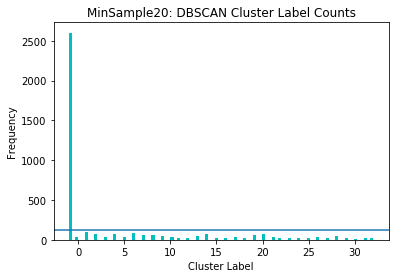

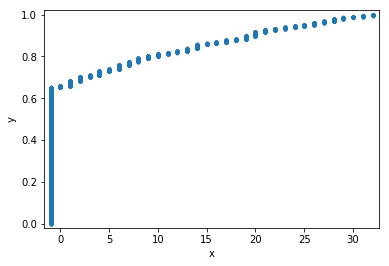

In [16]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
lab = df['minSample20']
counting = df.groupby('minSample20').count()
countr = df['minSample15'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("MinSample20: DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['minSample20'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['minSample20'])) / (len(df['minSample20']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()